# Tutorial 1d - Material Database Tutorial

This tutorial demonstrates how to use the material database in Optiland to compute optical properties, including refractive index and extinction coefficient versus wavelength. In Optiland, materials are properties of surfaces and are used to determine optical behavior at their interfaces. Optiland's material database is built on top of the [refractiveindex.info database](https://refractiveindex.info/).

We will demonstrate how to generate three material types:

1. `IdealMaterial`: Fixed refractive index and extinction coefficient.
2. `AbbeMaterial`: Ideal glass parameterized by refractive index at the Fraunhofer d-line (587.56 nm) and the Abbe number. Valid only over the visible spectrum.
3. `Material`: Generic material that provides interface to the [refractiveindex.info database](https://refractiveindex.info/).


We will show how to compute the refractive index for various materials, from glasses and chemicals to organic materials and gases.

### January 2025

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from optiland.materials import AbbeMaterial, IdealMaterial, Material

## 1. Ideal Material

The `IdealMaterial` class represents a material with a fixed refractive index and extinction coefficient. This is useful for simulations that require simple, constant parameters.

In [2]:
ideal_material = IdealMaterial(n=1.5, k=0)

wavelengths = [0.48, 0.55, 0.65]

for wavelength in wavelengths:
    print(f"Refractive Index at {wavelength} µm: {ideal_material.n(wavelength)}")
    print(
        f"Extinction Coefficient at {wavelength} µm: {ideal_material.k(wavelength)}",
        end="\n\n",
    )

Refractive Index at 0.48 µm: [1.5]
Extinction Coefficient at 0.48 µm: [0.]

Refractive Index at 0.55 µm: [1.5]
Extinction Coefficient at 0.55 µm: [0.]

Refractive Index at 0.65 µm: [1.5]
Extinction Coefficient at 0.65 µm: [0.]



## 2. Abbe Material

The `AbbeMaterial` class generates a model optical glass material in the visible spectrum. The material is defined by the refractive index at the Fraunhofer d-line (587.56 nm) and the Abbe number. The refractive index is based on a polynomial fit to glass data from the Schott catalog. The extinction coefficient is ignored in this model and is always set to zero, although this can be overwritten.

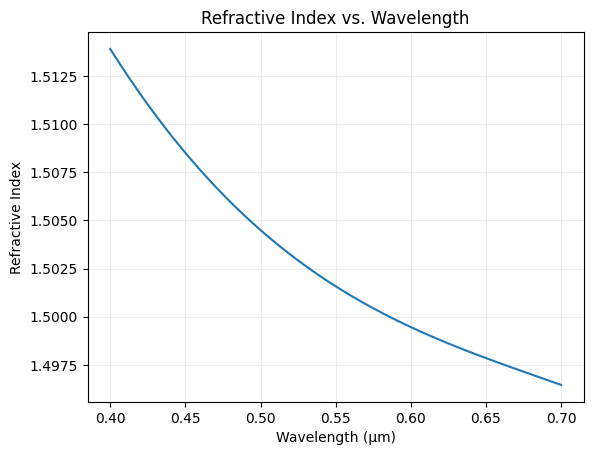

In [3]:
abbe_material = AbbeMaterial(n=1.5, abbe=65.0)

wavelengths = np.linspace(0.4, 0.7, 256)

n_abbe = abbe_material.n(wavelengths)

plt.plot(wavelengths, n_abbe)
plt.xlabel("Wavelength (µm)")
plt.ylabel("Refractive Index")
plt.title("Refractive Index vs. Wavelength")
plt.grid(alpha=0.25)
plt.show()

## 3. Material Class (RefractiveIndex.info Integration)

The `Material` class connects to refractiveindex.info to access real-world material data. It uses string matching to find the closest match for a given material name.

#### Example 1: A common glass type

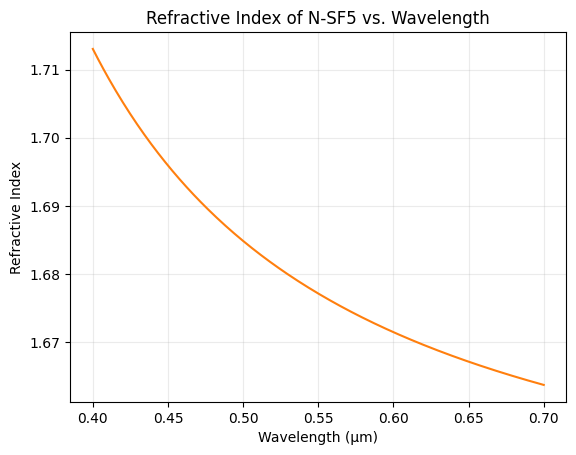

In [4]:
glass = Material("N-SF5")

n_sf5 = glass.n(wavelengths)

plt.plot(wavelengths, n_sf5, "C1")
plt.xlabel("Wavelength (µm)")
plt.ylabel("Refractive Index")
plt.title("Refractive Index of N-SF5 vs. Wavelength")
plt.grid(alpha=0.25)
plt.show()

Note that you may also pass a reference name to the material, which narrows down the material selection if there are multiple matches for the given material name. The reference can include e.g., the glass manufacturer, the author name, year of publication, etc.

In [5]:
glass = Material("N-SF5", reference="Schott")

#### Example 2: Organic material (DNA)

In [6]:
DNA = Material("DNA")

wavelength = 0.26

# call `.item()` to get the value as a scalar
print(f"Refractive Index of DNA at {wavelength} µm: {DNA.n(wavelength).item():.5f}")

Refractive Index of DNA at 0.26 µm: 1.65214


#### Example 3: Others materials (AgCl & toluene)

In [7]:
silver_chloride = Material("AgCl")
toluene = Material("toluene")

wavelength = 0.55

print(
    f"Refractive Index of AgCl at {wavelength} µm: {silver_chloride.n(wavelength).item():.5f}",
)
print(
    f"Refractive Index of toluene at {wavelength} µm: {toluene.n(wavelength).item():.5f}"
)

Refractive Index of AgCl at 0.55 µm: 2.07748
Refractive Index of toluene at 0.55 µm: 1.50006


#### Example 4: Gases (helium)

In [8]:
he = Material("He")

wavelength = 0.612

print(f"Refractive Index of He at {wavelength} µm: {he.n(wavelength).item():.7f}")

Refractive Index of He at 0.612 µm: 1.0000349


## Conclusion:

This tutorial showcased the key features of the Optiland material database. By leveraging `IdealMaterial`, `AbbeMaterial`, and `Material`, users can simulate a wide variety of optical systems with realistic material properties.